# Transmissive Time-Domain Electron Phase Modulators 

In this document, a general semiclassical treatement of an electron passing through a thin, time-varying phase-modulator is developed.  The phase modulation is assumed to originate from an on-axis time-varying electric field.  The electron is assumed to pass through some thin region of space which contains an oscillating electric field pointing along the axis of propagation of the electron.  Upon exiting this thin region of field, the electron wavepacket has experienced a net, time-varying potential.  The assumption is that this time-varying potential has a cycle time that is much shorter than the duration of the electron wavepacket.  

## Theoretical Treatment

A key aspect of the kind of phase modulation that we will be discussing here is that there is a net potential step as a funciton of time experienced by the electron.  This can only occur for a localized field transient induced by a surface, as an electron that interacts with a freely-propagating mode cannot experience a net energy shift, only a pure time-averaged phase shift.  

The treatment developed here has a few assumptions.  First, it is assumed that the electron obeys the slowly varying envelope approximation as it passes through the modulator, which in essence means that the temporal dilation of the wavepacket is minimal during passage.  Note, this is not assumed after the modulator, just during passage.  We can express the incoming wavepacket as

\begin{equation}
\Psi(x, t) = A(x - vt)e^{ik_0x}e^{-iE_0t/\hbar}
\end{equation}

Assuming the transmission through the modulator is 100% and that the electron moves sufficiently fast through the modulator so that it does not significantly reshape during its transit through the fields, we find that at the output port of the modulator would have a phase modulation $\varphi(t)$, and would be expressed as:

\begin{equation}
\psi(0, t)  = A(-vt)e^{-iE_0t/\hbar}e^{-j\varphi(t)}
\end{equation}

Where we take the output of the modulator at $x = 0$.  Given the net potential ramp from the oscillatig electric field region it passed through, we find that: 

\begin{equation}
\frac{1}{\hbar} \varphi(t) =  \int^t V(0, t') \mathrm{d}t'
\end{equation}

where $V(t)$ is the net potential experienced by the electron as it passes through the modulator.  

Now that the modulation is accounted for, we want to know two things: (1) what is the new energy spectrum of the electron after interaction with the modulator; and (2) how does the electron wavepacket evolve in space and time as it travels away from the modulator element.

Starting with (1), we find the energy spectrum can easily be obtained through the Fourier transform of the probability current at the output port of the modulator.  The wavepacket k-space amplitude is simply expressed as:

\begin{equation}
a(k) = \frac{(k + k_0)}{2\sqrt{2\pi}} \int_{-\infty}^\infty \mathrm{d}t e^{iEt/\hbar} \varphi(0, t)\mathrm{,}
\end{equation}

where we have used the slowly varying envelope approximation for the spatial derivative.  Note that $E$ is the outgoing energy, and is expressed as $E = k^2\hbar^2/2m$, where $m$ is the electron mass.  This is nice because it allows us to use a simple Fourier transform with respect to $E$.  

Next, for (2) the propagation, we simply need to move each plane-wave component with amplitude $a(k)$ forward in time and reconstruct the wavepacket in space.  This can be done as follows for a general treatment of $\psi(x, t)$ such that $x > 0$.  

\begin{equation}
\psi(x > 0, t) = \int_{-\infty}^{\infty} \mathrm{d}k a(k) e^{-iE(k)t/\hbar}e^{ikx}\mathrm{.}
\end{equation}

This is basically the entire problem that we want to solve.  In the next sections, we perform these calculations and discuss the results.

## Example: Phase Modulation, Sub-Cycle Bunching, and Demodulation

In this example, we perform an example calculation of phase modulation, attosecond bunching, and then demodulation.  

### Modulation

We start by setting up our initial conditions.  We assume an input electron wavepacket with a time duration of 10 femtoseconds.  We keep it short here to keep things quick, but this packet could be longer.  The wavepacket envelope is defined by `A`.  

Summary of wavepacket settings:
 * Duration: 10 fs
 * Central Energy: 1 keV


In [1]:
clear all;
addpath('../');

% Constants:
c = 299.79245; %speed of light in nm/fs

%Time axis and wavepacket pulse envelope for electron:
t = linspace(-100, 100, 2000); %Time axis in fs
W0 = 1e3; %Central energy in eV
t_electron = 10; %FWHM of electron wavepacket in fs

%Calculate the wavepacket envelope
[A, garbage] = gaussian_pulse(t, t_electron, 0, 0);

Next we enter the settings for our modulator.  For this we assume a modulation potential having a duration of 200 femtoseconds, a central wavelength of 1000 nm, and a peak value of 5 eV. The function `calc_energy_spec` is used to calculate the outgoing energy spectrum of the modulator for the specified wavepacket envelope `A`. 

Summary of modulator settings:
 * Duration: 200 fs
 * Modulation Strength: 5 eV

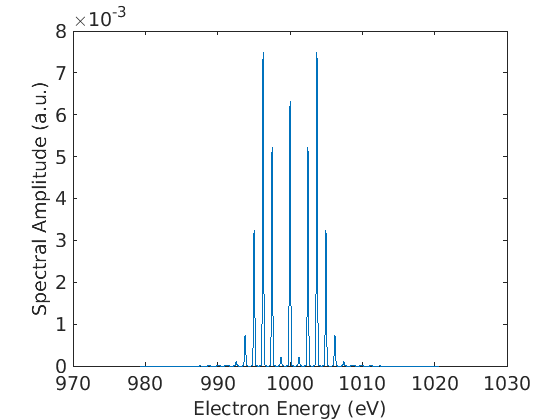

In [3]:

%Modulator settings:
lambda = 1000; %Wavelength in nm
V_mag = 5; %Modulator potential strength in eV
t_V = 200; %Duration of modulation function (FWHM in fs)

%Calculate the central frequency of the modulator and its function
omega = 2*pi*c/lambda;
[V_env, garbage] = gaussian_pulse(t, t_V, omega, 0); %Potential function
V = V_mag*V_env; %Construct the actual potential profile

%Calculate and plot the energy spectrum
[k, a_k, W, P_W] = calc_energy_spec(t, A, W0, V);

figure(1);
plot(W, P_W);
set(gca, 'fontsize', 14);
xlabel('Electron Energy (eV)', 'fontsize', 14);
ylabel('Spectral Amplitude (a.u.)', 'fontsize', 14);

Note that the central energy is maintained, but sidebands have been formed at multiples of the modulation photon energy due to the time-domain phase modulation.  This phase modulation also imparts regions of quadratic phase that lead to "temporal focusing" that we will explore in the next section.  

### Sub-Cycle Bunching

Due to the phase modulation imparted by passing through the modulator element, there are regions of quadratic phase temporally that lead to sub-optical-cycle bunching of the electron wavepacket as it propagates.  Just like a spatial lens, this focusing effect leads to bunching at a region in space after the modulator element, after which the electron packet starts to break apart again.  

We can propagate the wavepacket forward in space to see this as described earlier.  There are two functions that do this based on the output of `calc_energy_spec()`.  

Propagation Functions:
 * `propagate_fixed_time()` -- Propagates the electron forward for a fixed amount of time and returns the wavepacket as a function of space.
 * `propagate_fixed_space()` -- Outputs the electron wavepacket as a function of time as it passes a fixed region of space.






## Notes About The Code

In the code, the steps outlined above are taken almost exactly, but with some extra numerical considerations.  Note that for every fourier transform, the central energy and momenta are typically removed to avoid very high-frequency oscillating terms.  By taking out these central energy and momenta values, we relax sampling and memory constraints.  However, the removal of these terms leads to a bit of acrobatics where you have to make sure to put it in later, and keep track of the central location in time and space of the wavepacket.  Regardless, the code handles all of this for a user, so it is no problem.  
